In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

In [2]:
import pdb
from scipy import integrate
from scipy import special
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from patch_geo_func import x_ep, y_ep
from sys import stdout
import warnings
warnings.filterwarnings(action="error", category=np.ComplexWarning)

In [3]:
from assign_attr import *
from repel_system import *

In [4]:
LR_Pi_file = 'cortex_94-Ny/Ny-2-LR_Pi.bin'
#pos_file = 'server_data/test_3d_pos.bin'
pos_file = 'server_data/test_low_3d_pos.bin'
nblock = 32 #5209 #32
blockSize = 1024

a = 0.635
b = 96.7
k = np.sqrt(140)*0.873145
ecc = 2.0 # must consistent with the corresponding variables in parameter.m and macro.ipynb
p0 = -np.pi/2
p1 = np.pi/2

grid = np.array([64,104])*2
nx = grid[0]
ny = grid[1]
W = x_ep(ecc,0,k,a,b)
d = (1+2/nx)*W/nx
x = np.linspace(-W/nx, W+W/nx, nx)
W = W+2*W/nx
H = d*ny
y = np.linspace(-H/2, H/2, ny)
mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, pos_file, a, b, k, ecc, p0, p1)

211x342, ecc-polar grid houses 32768 neurons
require 0.086 GB


In [4]:
mMap.assign_pos_VF()

assgining visual field: 100.000%


array([[ 6.53472541e-02,  1.30344720e-01,  7.86498132e-02, ...,
         1.97205942e+00,  1.95754790e+00,  1.77860539e+00],
       [ 1.10154941e-16, -6.73792158e-01,  1.24189333e+00, ...,
         1.53591862e+00,  1.09598344e+00,  1.43274708e+00]])

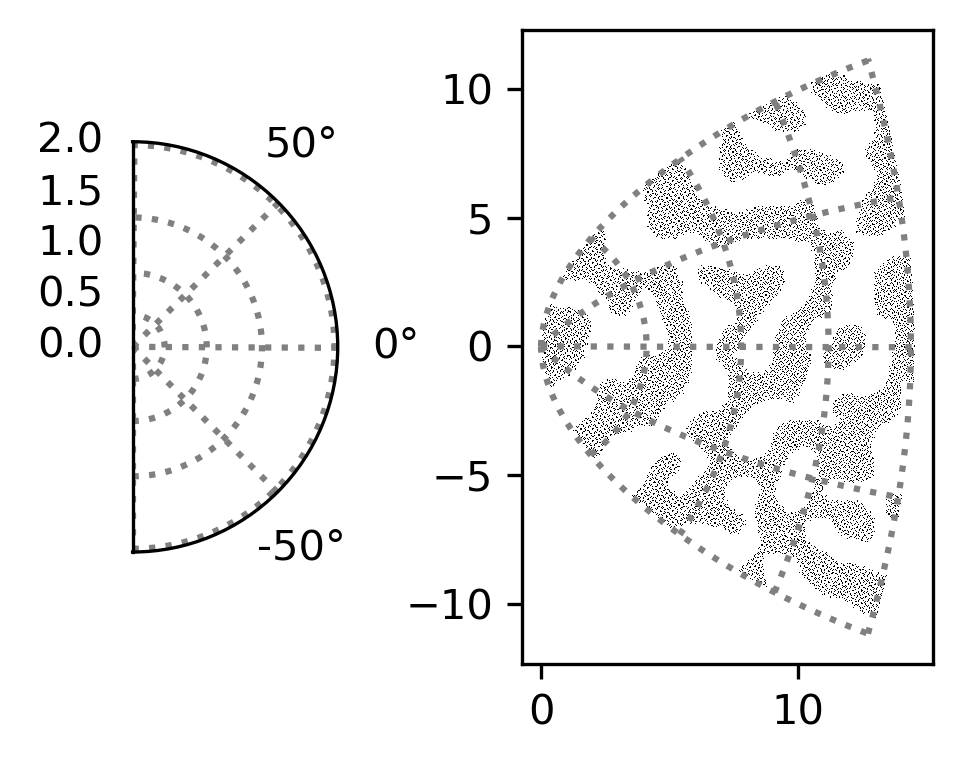

In [5]:
fig = plt.figure('macroMap',dpi=300)
ax1 = fig.add_subplot(131, projection='polar')
ax2 = fig.add_subplot(132)
#mMap.assign_pos_OD0()
#mMap.assign_pos_OD1()
mMap.plot_map(ax1,ax2,True,False)
ax1.set_thetamin(p0/np.pi*180)
ax1.set_thetamax(p1/np.pi*180)
ax1.set_rmax(2.0)
ax1.set_rmin(0.0)
ax1.grid(False)
ax1.tick_params(labelleft=False, labelright=True,
               labeltop=False, labelbottom=True)
#ax1.set_yticks([0,0.5,1.00,1.50,2.00])
ax2.set_aspect('equal')

2278 boundary points and 16374 particles initialized


NameError: name 'turntype' is not defined

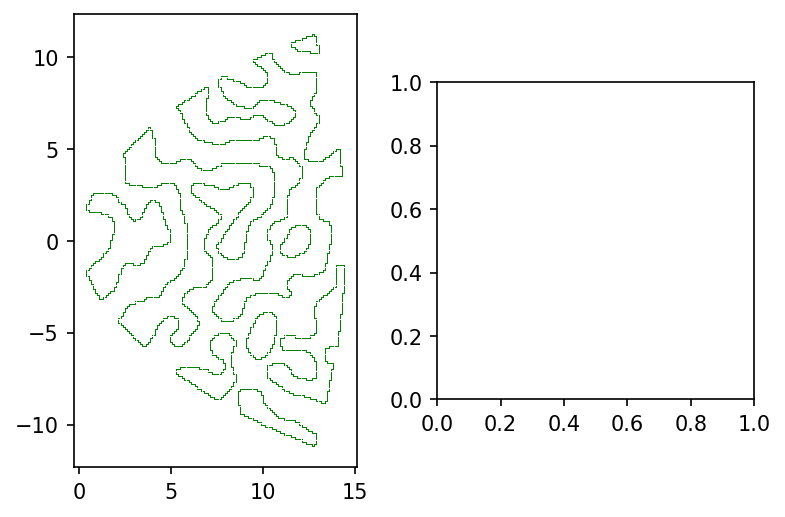

In [84]:
fig = plt.figure('vpos', dpi = 150)
ax1 = fig.add_subplot(121)
# reference grid
#ax1.plot(mMap.xx[0:2,0:2], mMap.yy[0:2,0:2],',r')
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122)
#ax2.plot(mMap.xx[mMap.LR == -1], mMap.yy[mMap.LR == -1],',k')
ax2.set_aspect('equal')
mMap.spread_pos(np.array([1]), ax1 = ax1, ax2 = ax2, seed = 17482321)

In [81]:
%debug

> c:\users\gueux\repos\patchv1\repel_system.py(121)<lambda>()
    119             self.rec = rec
    120 
--> 121         self.f = lambda r: param.k1/r*param.a*np.power(param.cl/r,param.k1) - param.k2/r*param.b*np.power(param.cl/r.param.k2)
    122         self.get_acc = np.empty(self.n, dtype = object)
    123         for i in range(self.n):



ipdb>  up


> c:\users\gueux\repos\patchv1\repel_system.py(145)get_rh()
    143         r = np.abs(d)
    144         pick =  r < self.r0
--> 145         acc[:,pick] = np.array(0, [np.copysign(self.f(r), d)])
    146         return acc
    147     # vertical



ipdb>  print(r)


[0.21026985 0.16437426 0.11082939 0.14142646 0.03433673 0.03068203
 0.15290036 0.0534599  0.20644522 0.12421561 0.09361855 0.20070827
 0.02477515 0.07067075 0.18158511]


ipdb>  q


(0, 0.25)

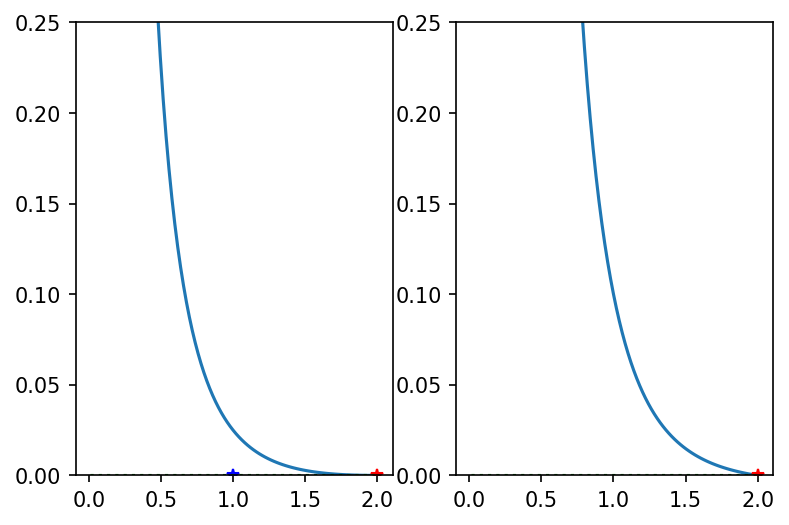

In [34]:
a = 0.1
b = 0.1
k1 = 2
k2 = 1
cl = 1
r0 = np.power(b*k2/a/k1,-1/(k1-k2))*cl
shift = a*np.power(cl/r0,k1) - b*np.power(cl/r0,k2)
ph = lambda r: a*np.power(cl/r,k1) - b*np.power(cl/r,k2) - shift
f = lambda r: a*k1/r*np.power(cl/r,k1) - b*k2/r*np.power(cl/r,k2)
epsilon = 0.01
top = 10 * np.abs(shift)
bottom = 0
n = 100
r = np.linspace(0,r0,n)+epsilon
fig = plt.figure('potential-force', dpi = 150)
ax1 = fig.add_subplot(121)
ax1.plot(r,ph(r))
ax1.plot(r0,ph(r0),'*r')
ax1.plot(cl,0,'*b')
ax1.plot(r,np.zeros((n,1)),':g')
ax1.set_ylim(bottom, top)
ax2 = fig.add_subplot(122)
ax2.plot(r,f(r))
ax2.plot(r0,f(r0), '*r')
ax2.plot(r,np.zeros((n,1)),':g')
ax2.set_ylim(bottom, top)

(10, 1, 3)
(10, 3)


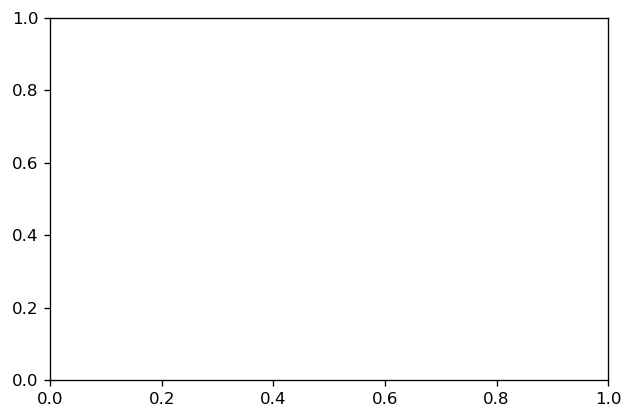

In [29]:
fig = plt.figure('test', dpi = 120)
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10,1,3), np.random.rand(10,1,3))
a = np.random.rand(10,1,3) 
print(a.shape)
print(a.squeeze().shape)

In [61]:
mMap.xx[:,1]

array([0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267408,
       0.00267408, 0.00267408, 0.00267408, 0.00267408, 0.00267